# Data set generators

In [1]:
#imports
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

In [531]:
# Generate data
def generate_row():
    """
    Generate one random employee for the dataset
    """
    
    experience = random.randint(0,40)
    degree = int(random.random() < 0.75)
    performance = round(random.random()*10,2)
    
    missed_meetings = 30 - 2*int(performance) +random.randint(-10,10)
    
    sales = random.randint(0,900)
    
    r = random.random()
    department = 'Executive'
    if r < 0.2: department  = 'Finance'
    elif r < 0.4: department  = 'IT'
    elif r < 0.6: department  = 'Accounting'
    elif r < 0.75: department = 'HR'
    elif r < 0.90: department = 'Legal'
        
    last_year = int(random.random() < 0.2)
    gender = int(random.random() < 0.5)
    
    
    
    return {'experience':experience, 
            'degree':degree, 
            'performance':performance,
            'missed_meetings':missed_meetings,
            'sales':sales,
            'department':department,
            'last_year':last_year,
            'gender':gender}

In [509]:
def score_row(employee):
    """
    Score an employee based on employee data
    """
    score = 0
    
    score+=0.25*employee['experience']
    score+=20*employee['degree']
    score+=2*employee['experience']*employee['degree']
    score+= 4*employee['performance']**2
    score+= -0.5*employee['missed_meetings']
    
    score+= 4*np.sqrt(employee['sales'])
    
    if employee['department'] in ('Finance','IT','Accounting'): score+=30
    elif employee['department'] in ('HR','Legal'): score+=10
    elif employee['department'] in ('Executive'): score+=0  
        
    score+=20*(1-employee['last_year'])
        
    score += random.randint(0,20)    
    
    return round(score)



In [512]:
data.to_csv('../data/random_promotion_dataset.csv',index=False)

In [513]:
data = pd.read_csv('../data/random_promotion_dataset.csv')
data.head()

,degree,department,experience,gender,last_year,missed_meetings,performance,promotion,sales,score
0,1,Legal,8,0,0,11,7.52,1,244,362.0
1,1,IT,12,1,0,18,5.67,1,648,318.0
2,1,Legal,21,1,1,20,6.85,1,612,365.0
3,1,IT,6,0,0,16,7.82,1,811,437.0
4,0,Executive,3,0,0,39,0.68,0,153,69.0


# Data Exploration

In [514]:
print(len(data))

# Summary
print(np.mean(data.experience))
print(np.mean(data.degree))
print(np.mean(data.performance))
print(np.mean(data.missed_meetings))
print(data.department.value_counts())
print(np.mean(data.last_year))
print(data.gender.value_counts())
print(np.mean(data.promotion))

data.head()

1000
20.099
0.765
4.968789999999999
21.169
Accounting    206
IT            200
Finance       191
Legal         150
HR            143
Executive     110
Name: department, dtype: int64
0.187
0    511
1    489
Name: gender, dtype: int64
0.441


,degree,department,experience,gender,last_year,missed_meetings,performance,promotion,sales,score
0,1,Legal,8,0,0,11,7.52,1,244,362.0
1,1,IT,12,1,0,18,5.67,1,648,318.0
2,1,Legal,21,1,1,20,6.85,1,612,365.0
3,1,IT,6,0,0,16,7.82,1,811,437.0
4,0,Executive,3,0,0,39,0.68,0,153,69.0


In [515]:
for degree in set(data.degree):
    datax = data[data.degree==degree]
    print(degree, len(datax), sum(datax.promotion)/len(datax), np.mean(datax.score))

0 235 0.3446808510638298 258.11914893617023
1 765 0.47058823529411764 310.5032679738562


### Missed Meetings (Negative Relationship)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text xticklabel objects>)

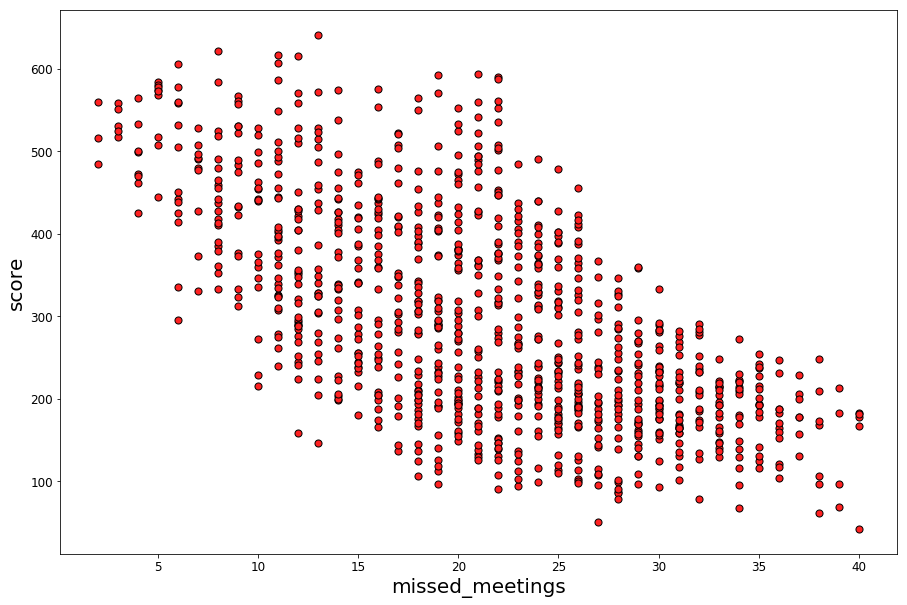

In [516]:
plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('missed_meetings','score',c='#ff2121',s=50,edgecolors='#000000',data=data)
plt.ylabel("score",size=20)
plt.xlabel('missed_meetings',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
#plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

#plt.savefig('../figures/article_feature_eng/figure1.png',format='png')

### Performance (Non-linear Relationship)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text xticklabel objects>)

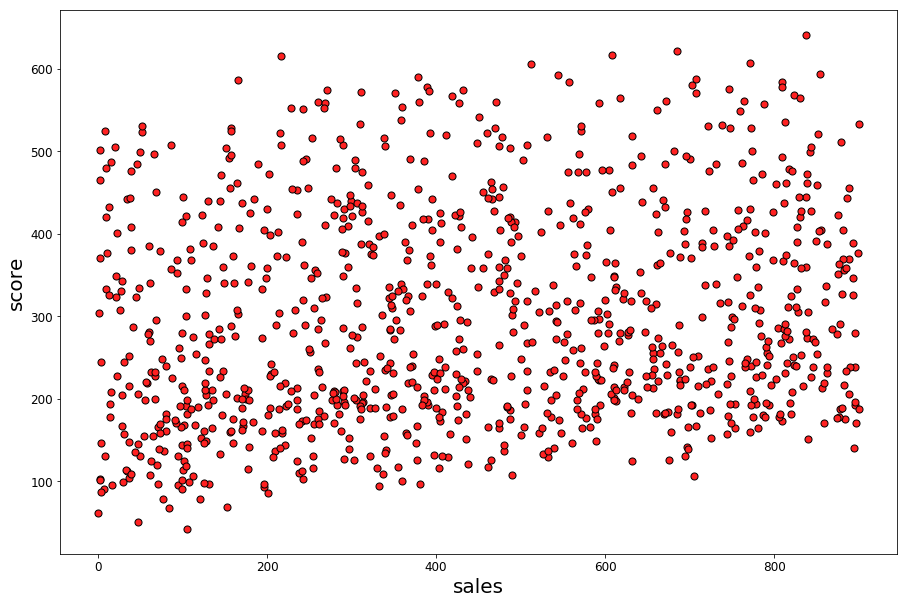

In [517]:
plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('sales','score',c='#ff2121',s=50,edgecolors='#000000',data=data)
plt.ylabel("score",size=20)
plt.xlabel('sales',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
#plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

#plt.savefig('../figures/article_feature_eng/figure1.png',format='png')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

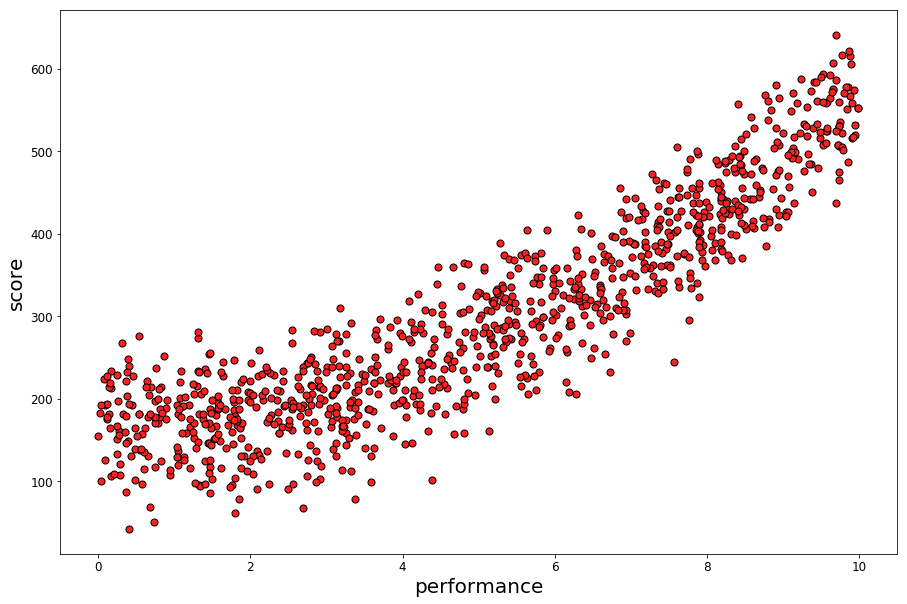

In [518]:
plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('performance','score',c='#ff2121',s=50,edgecolors='#000000',data=data)
plt.ylabel("score",size=20)
plt.xlabel('performance',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

#plt.savefig('../figures/article_feature_eng/figure1.png',format='png')

### Correlation

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

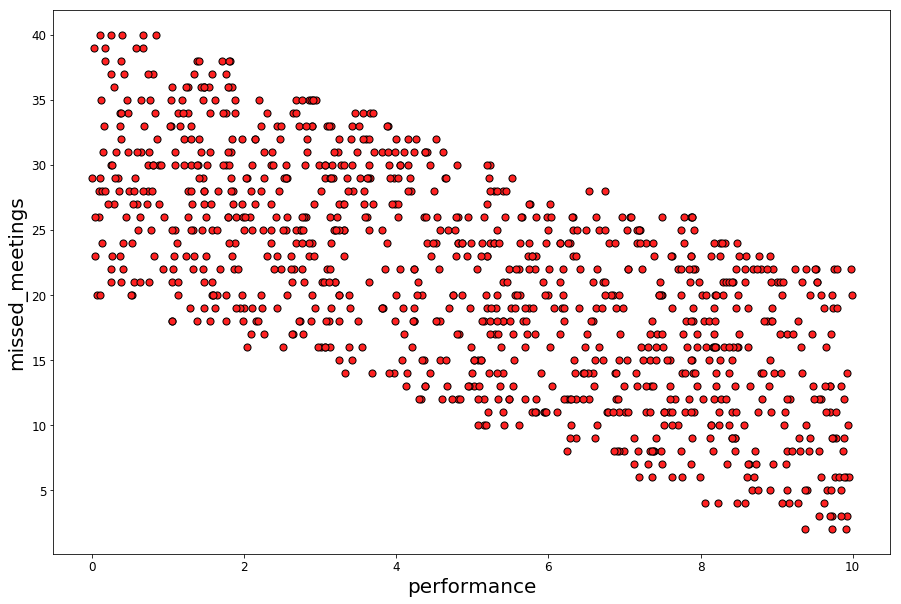

In [519]:
plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('performance','missed_meetings',c='#ff2121',s=50,edgecolors='#000000',data=data)
plt.ylabel("missed_meetings",size=20)
plt.xlabel('performance',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
#plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

#plt.savefig('../figures/article_feature_eng/figure1.png',format='png')

### Interaction

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text xticklabel objects>)

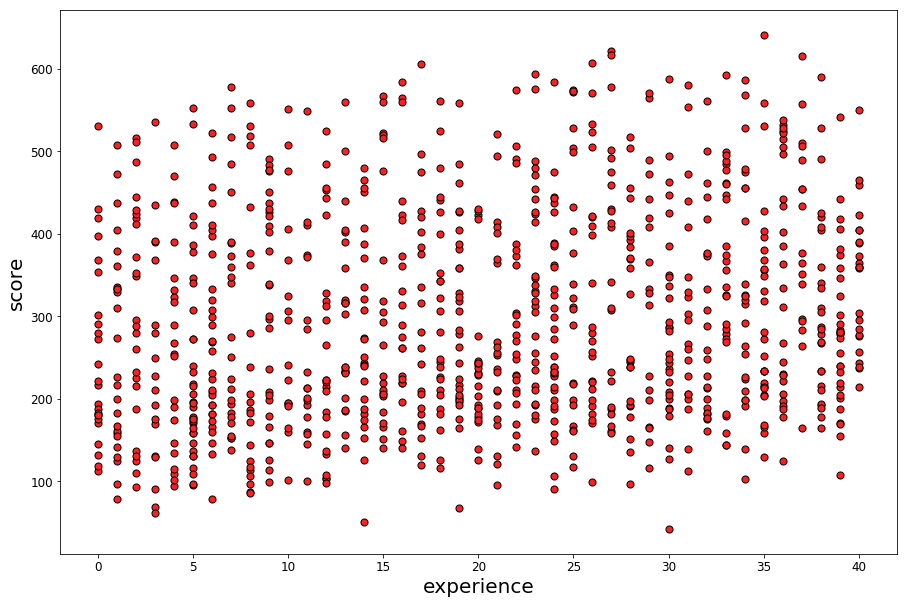

In [520]:
plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('experience','score',c='#ff2121',s=50,edgecolors='#000000',data=data)
plt.ylabel("score",size=20)
plt.xlabel('experience',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

In [408]:
data_original = data.copy(deep=True)

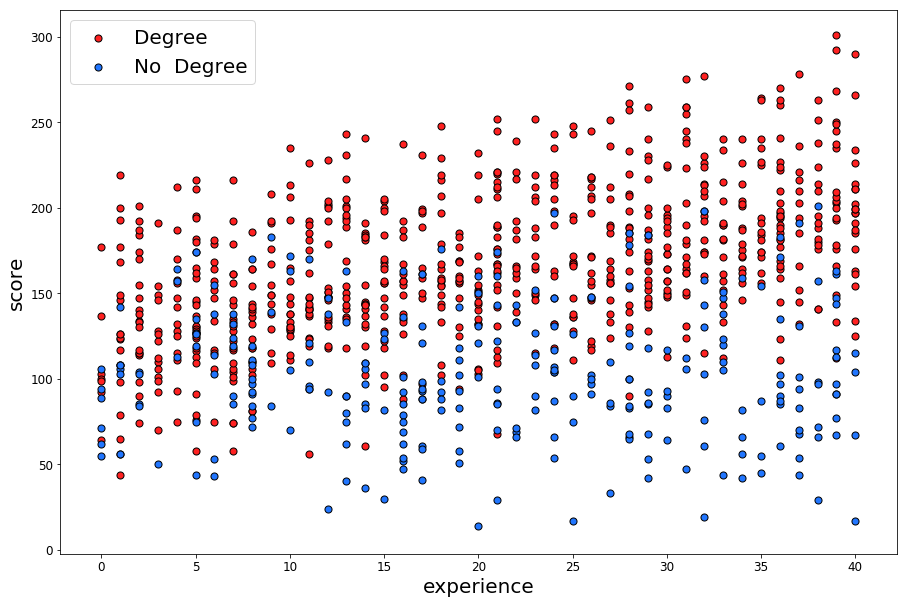

In [521]:
data_original = data.copy(deep=True)

plt.subplots(nrows=1, ncols=1,figsize=(15,10))
plt.scatter('experience','score',c='#ff2121',s=50,edgecolors='#000000',data=data_original[data_original.degree == 1])
plt.scatter('experience','score',c='#2176ff',s=50,edgecolors='#000000',data=data_original[data_original.degree == 0])
plt.ylabel("score",size=20)
plt.xlabel('experience',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.legend(['Degree','No  Degree'],loc =2,prop={"size":20})

## Logistic Regression 

In [522]:
features = data[['experience','performance', 'missed_meetings','sales','degree','gender','last_year']]

dep_dummies = pd.get_dummies(data['department'])
features['Accounting'] = dep_dummies['Accounting']
features['Finance'] = dep_dummies['Finance']
features['IT'] = dep_dummies['IT']
features['HR'] = dep_dummies['HR']
features['Legal'] = dep_dummies['Legal']
features.head()

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,experience,performance,missed_meetings,sales,degree,gender,last_year,Accounting,Finance,IT,HR,Legal
0,8,7.52,11,244,1,0,0,0,0,0,0,1
1,12,5.67,18,648,1,1,0,0,0,1,0,0
2,21,6.85,20,612,1,1,1,0,0,0,0,1
3,6,7.82,16,811,1,0,0,0,0,1,0,0
4,3,0.68,39,153,0,0,0,0,0,0,0,0


In [523]:
X = features
y = data['promotion']

X = sm.add_constant(X)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)

model = sm.Logit(y_train,x_train).fit() #fit logistic regression model

train_preds = np.around(model.predict(x_train)) 
test_preds = np.around(model.predict(x_test)) 

# Accuracy
train_accuracy = accuracy_score(y_train,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)
print("Train:{} Test:{}".format(round(train_accuracy*100,2),round(test_accuracy*100,2)))

# Prediction and evaluation
print(classification_report(y_test,test_preds))

# Create confusion matrix
print(confusion_matrix(y_test,test_preds))

model.summary()

Optimization terminated successfully.
         Current function value: 0.045749
         Iterations 13
Train:98.0 Test:97.0
             precision    recall  f1-score   support

          0       0.98      0.97      0.98       182
          1       0.96      0.97      0.96       118

avg / total       0.97      0.97      0.97       300

[[177   5]
 [  4 114]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              promotion   No. Observations:                  700
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                           12
Date:                Thu, 26 Nov 2020   Pseudo R-squ.:                  0.9337
Time:                        14:54:15   Log-Likelihood:                -32.025
converged:                       True   LL-Null:                       -483.12
                                        LLR p-value:                1.948e-185
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -59.5629     11.154     -5.340      0.000     -81.424     -37.702
experience          0.2459      0.054      4.548      0.000       0.140       0.352
performance         6.9988      1.311      5.338      0.000       4.429       9.568
missed_meetings    -0.1137      0.066     -1.726      0.084      -0.243       0.015
sales               0.0121      0.003      4.658      0.000       0.007       0.017
degree              9.7675      2.004      4.874      0.000       5.840      13.695
gender             -0.2578      0.693     -0.372      0.710      -1.617       1.101
last_year          -3.1600      1.104     -2.862      0.004      -5.324      -0.996
Accounting          7.1241      1.941      3.670      0.000       3.320      10.928
Finance             6.9309      1.949      3.556      0.000       3.111      10.751
IT                  6.0129      1.933      3.111      0.002       2.224       9.801
HR                  4.1898      1.671      2.508      0.012       0.915       7.464
Legal               3.3869      1.544      2.194      0.028       0.361       6.413
===================================================================================

Possibly complete quasi-separation: A fraction 0.76 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [525]:
features = data[[ 'missed_meetings','degree','last_year']]
features['degree_experience'] = features['degree']*data['experience']
features['perf_sqrd'] = data['performance']**2


dep_dummies = pd.get_dummies(data['department'])
features['dep_1']=dep_dummies['Accounting']+dep_dummies['Finance']+dep_dummies['IT']
features['dep_2']=dep_dummies['HR']+dep_dummies['Legal']

features.head()

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,missed_meetings,sales,degree,last_year,degree_experience,perf_sqrd,dep_1,dep_2
0,11,244,1,0,8,56.5504,0,1
1,18,648,1,0,12,32.1489,1,0
2,20,612,1,1,21,46.9225,0,1
3,16,811,1,0,6,61.1524,1,0
4,39,153,0,0,0,0.4624,0,0


In [526]:
X = features
y = data['promotion']

X = sm.add_constant(X)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)

model = sm.Logit(y_train,x_train).fit() #fit logistic regression model

train_preds = np.around(model.predict(x_train)) 
test_preds = np.around(model.predict(x_test)) 

# Accuracy
train_accuracy = accuracy_score(y_train,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)
print("Train:{} Test:{}".format(round(train_accuracy*100,2),round(test_accuracy*100,2)))

# Prediction and evaluation
print(classification_report(y_test,test_preds))

# Create confusion matrix
print(confusion_matrix(y_test,test_preds))

model.summary()

Optimization terminated successfully.
         Current function value: 0.017322
         Iterations 16
Train:99.71 Test:98.33
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       182
          1       0.98      0.97      0.98       118

avg / total       0.98      0.98      0.98       300

[[180   2]
 [  3 115]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              promotion   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Thu, 26 Nov 2020   Pseudo R-squ.:                  0.9749
Time:                        14:54:35   Log-Likelihood:                -12.125
converged:                       True   LL-Null:                       -483.12
                                        LLR p-value:                4.944e-198
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -152.1895     54.361     -2.800      0.005    -258.735     -45.644
missed_meetings      -0.4768      0.191     -2.501      0.012      -0.851      -0.103
sales                 0.0566      0.020      2.867      0.004       0.018       0.095
degree               12.1388      4.669      2.600      0.009       2.987      21.291
last_year            -9.1262      3.497     -2.610      0.009     -15.979      -2.273
degree_experience     1.3958      0.512      2.726      0.006       0.392       2.399
perf_sqrd             2.5084      0.893      2.810      0.005       0.759       4.258
dep_1                31.6789     11.367      2.787      0.005       9.400      53.958
dep_2                20.6349      7.420      2.781      0.005       6.091      35.179
=====================================================================================

Possibly complete quasi-separation: A fraction 0.94 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              promotion   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Thu, 26 Nov 2020   Pseudo R-squ.:                  0.9033
Time:                        14:35:27   Log-Likelihood:                -41.351
converged:                       True   LL-Null:                       -427.61
                                        LLR p-value:                1.587e-162
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -35.1963      5.443     -6.466      0.000     -45.865     -24.527
missed_meetings      -0.2411      0.061     -3.982      0.000      -0.360      -0.122
degree                5.0424      1.281      3.935      0.000       2.531       7.554
last_year            -7.0821      1.354     -5.230      0.000      -9.736      -4.428
degree_experience     0.7155      0.108      6.655      0.000       0.505       0.926
perf_sqrd             1.2641      0.191      6.618      0.000       0.890       1.638
dep_1                 8.9818      1.839      4.885      0.000       5.378      12.586
dep_2                 2.6288      1.388      1.894      0.058      -0.092       5.350
=====================================================================================

Possibly complete quasi-separation: A fraction 0.62 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Random Forest

In [384]:
dep_encode = {'Executive':0,'Accounting':1, 'Finance':2, 'IT':3, 'HR':4, 'Legal':5}
dep_encode

data_rf = data[['degree', 'department', 'experience', 'gender', 'last_year',
       'performance']]
data_rf['department'] = [dep_encode[x] for x in data_rf['department']]
data_rf.head()

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,degree,department,experience,gender,last_year,performance
0,1,3,40,0,0,3.99
1,0,0,1,1,0,0.10
2,1,3,33,0,1,1.96
3,1,0,40,1,0,4.14
4,1,3,6,0,0,3.65


In [385]:
#features = cancer['feature_names']
X = data_rf
y = data['promotion']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)
# Fitting the model
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train, y_train)

# Prediction and evaluation
train_preds = rfc.predict(x_train)
test_preds = rfc.predict(x_test)

# Accuracy
train_accuracy = accuracy_score(y_train,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)
print("Train:{} Test:{}".format(round(train_accuracy*100,2),round(test_accuracy*100,2)))

# Prediction and evaluation
print(classification_report(y_test,test_preds))

# Create confusion matrix
print(confusion_matrix(y_test,test_preds))

Train:100.0 Test:92.0
             precision    recall  f1-score   support

          0       0.94      0.90      0.92       146
          1       0.91      0.94      0.92       154

avg / total       0.92      0.92      0.92       300

[[131  15]
 [  9 145]]
